In [1000]:
#!/usr/bin/env python3


In [1001]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = None


data = pd.read_csv('datapoints-ssp-mock2.csv')
data2 = pd.read_csv('segments-ssp-mock2.csv')
print(data.head())

   id  segment_id           time_index  view_count  \
0   1         379  2022-01-01 00:00:00         177   
1   2         379  2022-01-01 01:00:00         135   
2   3         379  2022-01-01 02:00:00          26   
3   4         379  2022-01-01 03:00:00         159   
4   5         379  2022-01-01 04:00:00          50   

                                             devices  
0  {"windows": 120, "android": 7, "mac os x": 37,...  
1  {"windows": 92, "android": 5, "mac os x": 28, ...  
2  {"windows": 18, "android": 1, "mac os x": 5, "...  
3  {"windows": 108, "android": 6, "mac os x": 33,...  
4  {"windows": 34, "android": 2, "mac os x": 10, ...  


In [1002]:
data.head()

,id,segment_id,time_index,view_count,devices
0,1,379,2022-01-01 00:00:00,177,"{""windows"": 120, ""android"": 7, ""mac os x"": 37,..."
1,2,379,2022-01-01 01:00:00,135,"{""windows"": 92, ""android"": 5, ""mac os x"": 28, ..."
2,3,379,2022-01-01 02:00:00,26,"{""windows"": 18, ""android"": 1, ""mac os x"": 5, ""..."
3,4,379,2022-01-01 03:00:00,159,"{""windows"": 108, ""android"": 6, ""mac os x"": 33,..."
4,5,379,2022-01-01 04:00:00,50,"{""windows"": 34, ""android"": 2, ""mac os x"": 10, ..."


In [1003]:
value = data.isnull().values.any()
print(value)

False


In [1004]:
value = data['segment_id'].isnull().values.any()
print(value)

False


In [1005]:
# inspecting data

indexed_data = data.set_index('id')
indexed_data

#data.info()

,segment_id,time_index,view_count,devices
id,,,,
1,379,2022-01-01 00:00:00,177,"{""windows"": 120, ""android"": 7, ""mac os x"": 37,..."
2,379,2022-01-01 01:00:00,135,"{""windows"": 92, ""android"": 5, ""mac os x"": 28, ..."
3,379,2022-01-01 02:00:00,26,"{""windows"": 18, ""android"": 1, ""mac os x"": 5, ""..."
4,379,2022-01-01 03:00:00,159,"{""windows"": 108, ""android"": 6, ""mac os x"": 33,..."
5,379,2022-01-01 04:00:00,50,"{""windows"": 34, ""android"": 2, ""mac os x"": 10, ..."
...,...,...,...,...
95522,77,2022-11-27 01:00:00,240,"{""windows"": 110, ""android"": 12, ""mac os x"": 94..."
95523,77,2022-11-27 02:00:00,242,"{""windows"": 111, ""android"": 12, ""mac os x"": 94..."
95524,77,2022-11-27 03:00:00,207,"{""windows"": 95, ""android"": 10, ""mac os x"": 81,..."


In [1006]:
import json
devices = indexed_data['devices'].apply(json.loads).apply(pd.Series)
devices

,windows,android,mac os x,iphone,other
id,,,,,
1,120,7,37,9,2
2,92,5,28,7,1
3,18,1,5,1,0
4,108,6,33,8,2
5,34,2,10,2,0
...,...,...,...,...,...
95522,110,12,94,19,5
95523,111,12,94,19,5
95524,95,10,81,17,4


In [1007]:
indexed_data.shape # 95526 rows , 4 columns

segment_views = indexed_data.set_index('segment_id')[['time_index', 'view_count']]
segment_views

,time_index,view_count
segment_id,,
379,2022-01-01 00:00:00,177
379,2022-01-01 01:00:00,135
379,2022-01-01 02:00:00,26
379,2022-01-01 03:00:00,159
379,2022-01-01 04:00:00,50
...,...,...
77,2022-11-27 01:00:00,240
77,2022-11-27 02:00:00,242
77,2022-11-27 03:00:00,207


In [1008]:
segment_views['view_count'].median()

615.0

In [1009]:
indexed_data.head(15)

,segment_id,time_index,view_count,devices
id,,,,
1,379,2022-01-01 00:00:00,177,"{""windows"": 120, ""android"": 7, ""mac os x"": 37,..."
2,379,2022-01-01 01:00:00,135,"{""windows"": 92, ""android"": 5, ""mac os x"": 28, ..."
3,379,2022-01-01 02:00:00,26,"{""windows"": 18, ""android"": 1, ""mac os x"": 5, ""..."
4,379,2022-01-01 03:00:00,159,"{""windows"": 108, ""android"": 6, ""mac os x"": 33,..."
5,379,2022-01-01 04:00:00,50,"{""windows"": 34, ""android"": 2, ""mac os x"": 10, ..."
6,379,2022-01-01 05:00:00,164,"{""windows"": 112, ""android"": 7, ""mac os x"": 34,..."
7,379,2022-01-01 06:00:00,24,"{""windows"": 16, ""android"": 1, ""mac os x"": 5, ""..."
8,379,2022-01-01 07:00:00,246,"{""windows"": 167, ""android"": 10, ""mac os x"": 52..."
9,379,2022-01-01 08:00:00,462,"{""windows"": 314, ""android"": 18, ""mac os x"": 97..."


In [1010]:
indexed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95526 entries, 1 to 95526
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   segment_id  95526 non-null  int64 
 1   time_index  95526 non-null  object
 2   view_count  95526 non-null  int64 
 3   devices     95526 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.6+ MB


In [1011]:
import json


merged_df = pd.merge(data, data2, on='segment_id', how='left')
merged_df.head()

,id,segment_id,time_index,view_count,devices,segment_name
0,1,379,2022-01-01 00:00:00,177,"{""windows"": 120, ""android"": 7, ""mac os x"": 37,...",Technology & Computing
1,2,379,2022-01-01 01:00:00,135,"{""windows"": 92, ""android"": 5, ""mac os x"": 28, ...",Technology & Computing
2,3,379,2022-01-01 02:00:00,26,"{""windows"": 18, ""android"": 1, ""mac os x"": 5, ""...",Technology & Computing
3,4,379,2022-01-01 03:00:00,159,"{""windows"": 108, ""android"": 6, ""mac os x"": 33,...",Technology & Computing
4,5,379,2022-01-01 04:00:00,50,"{""windows"": 34, ""android"": 2, ""mac os x"": 10, ...",Technology & Computing


In [1012]:
indexed_df = merged_df.set_index('id')
indexed_df

,segment_id,time_index,view_count,devices,segment_name
id,,,,,
1,379,2022-01-01 00:00:00,177,"{""windows"": 120, ""android"": 7, ""mac os x"": 37,...",Technology & Computing
2,379,2022-01-01 01:00:00,135,"{""windows"": 92, ""android"": 5, ""mac os x"": 28, ...",Technology & Computing
3,379,2022-01-01 02:00:00,26,"{""windows"": 18, ""android"": 1, ""mac os x"": 5, ""...",Technology & Computing
4,379,2022-01-01 03:00:00,159,"{""windows"": 108, ""android"": 6, ""mac os x"": 33,...",Technology & Computing
5,379,2022-01-01 04:00:00,50,"{""windows"": 34, ""android"": 2, ""mac os x"": 10, ...",Technology & Computing
...,...,...,...,...,...
95522,77,2022-11-27 01:00:00,240,"{""windows"": 110, ""android"": 12, ""mac os x"": 94...",Pets
95523,77,2022-11-27 02:00:00,242,"{""windows"": 111, ""android"": 12, ""mac os x"": 94...",Pets
95524,77,2022-11-27 03:00:00,207,"{""windows"": 95, ""android"": 10, ""mac os x"": 81,...",Pets


In [1013]:
devices = indexed_df['devices'].apply(json.loads).apply(pd.Series)
devices

,windows,android,mac os x,iphone,other
id,,,,,
1,120,7,37,9,2
2,92,5,28,7,1
3,18,1,5,1,0
4,108,6,33,8,2
5,34,2,10,2,0
...,...,...,...,...,...
95522,110,12,94,19,5
95523,111,12,94,19,5
95524,95,10,81,17,4


In [1014]:
indexed_df.drop('devices', inplace=True, axis=1)
indexed_df

,segment_id,time_index,view_count,segment_name
id,,,,
1,379,2022-01-01 00:00:00,177,Technology & Computing
2,379,2022-01-01 01:00:00,135,Technology & Computing
3,379,2022-01-01 02:00:00,26,Technology & Computing
4,379,2022-01-01 03:00:00,159,Technology & Computing
5,379,2022-01-01 04:00:00,50,Technology & Computing
...,...,...,...,...
95522,77,2022-11-27 01:00:00,240,Pets
95523,77,2022-11-27 02:00:00,242,Pets
95524,77,2022-11-27 03:00:00,207,Pets


In [1015]:
final_data = indexed_df.merge(devices, on='id')
final_data.head()

,segment_id,time_index,view_count,segment_name,windows,android,mac os x,iphone,other
id,,,,,,,,,
1,379,2022-01-01 00:00:00,177,Technology & Computing,120,7,37,9,2
2,379,2022-01-01 01:00:00,135,Technology & Computing,92,5,28,7,1
3,379,2022-01-01 02:00:00,26,Technology & Computing,18,1,5,1,0
4,379,2022-01-01 03:00:00,159,Technology & Computing,108,6,33,8,2
5,379,2022-01-01 04:00:00,50,Technology & Computing,34,2,10,2,0


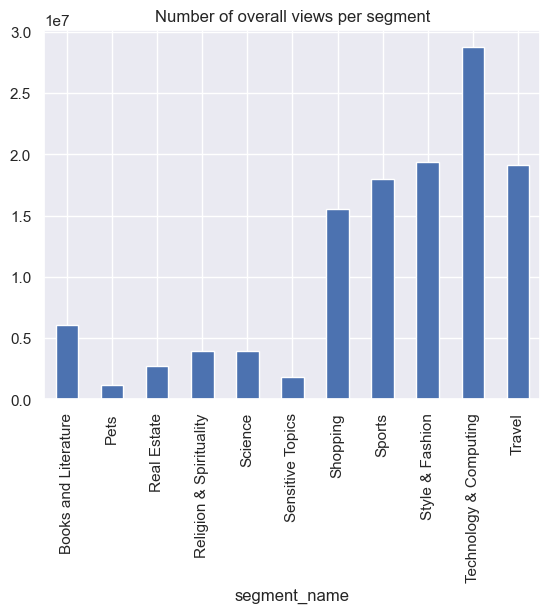

In [1016]:
nb_views_per_segment = final_data.groupby('segment_name')['view_count'].sum()
nb_views_per_segment.plot(kind='bar', title='Number of overall views per segment')
plt.show()

In [1017]:
final_data.pivot_table(values='view_count', index='segment_name', aggfunc=[np.mean, np.median, np.sum]) 
# most of views are connected to technology & computing, style & fashion and travel

,mean,median,sum
,view_count,view_count,view_count
segment_name,,,
Books and Literature,693.987671,650.5,6079332
Pets,148.435024,125.0,1176496
Real Estate,305.111872,280.0,2672780
Religion & Spirituality,445.540411,408.0,3902934
Science,446.420890,414.0,3910647
Sensitive Topics,203.652283,184.0,1783994
Shopping,1769.963356,1645.0,15504879
Sports,2048.963128,1922.5,17948917


In [1018]:
final_data.reset_index(drop=True).head(20)


,segment_id,time_index,view_count,segment_name,windows,android,mac os x,iphone,other
0,379,2022-01-01 00:00:00,177,Technology & Computing,120,7,37,9,2
1,379,2022-01-01 01:00:00,135,Technology & Computing,92,5,28,7,1
2,379,2022-01-01 02:00:00,26,Technology & Computing,18,1,5,1,0
3,379,2022-01-01 03:00:00,159,Technology & Computing,108,6,33,8,2
4,379,2022-01-01 04:00:00,50,Technology & Computing,34,2,10,2,0
5,379,2022-01-01 05:00:00,164,Technology & Computing,112,7,34,8,2
6,379,2022-01-01 06:00:00,24,Technology & Computing,16,1,5,1,0
7,379,2022-01-01 07:00:00,246,Technology & Computing,167,10,52,12,2
8,379,2022-01-01 08:00:00,462,Technology & Computing,314,18,97,23,5
9,379,2022-01-01 09:00:00,351,Technology & Computing,239,14,74,18,4


In [1019]:
final_data['windows'].cumsum().head()

id
1    120
2    212
3    230
4    338
5    372
Name: windows, dtype: int64

In [1020]:
final_data['time_index'] = pd.to_datetime(final_data['time_index'])

# Step 1: Filter data for "Technology & Computing" segment
tech_computing_df = final_data[final_data['segment_name'] == 'Technology & Computing']

# Step 2: Group by hour and calculate sum of Windows views
hourly_windows_sum = tech_computing_df.groupby(tech_computing_df['time_index'].dt.hour)['windows'].sum()

# Step 3: Group by hour and calculate count of data points
hourly_count = tech_computing_df.groupby(tech_computing_df['time_index'].dt.hour)['windows'].count()

# Step 4: Calculate average views on Windows per hour
average_views_per_hour = hourly_windows_sum / hourly_count

# Display the result
print(average_views_per_hour)


time_index
0     2236.558904
1     2343.147945
2     2510.142466
3     2331.115068
4     2273.016438
5     2009.468493
6     2036.356164
7     2067.975342
8     2226.630137
9     2331.487671
10    2493.457534
11    2333.145205
12    2280.616438
13    2018.112329
14    2038.901370
15    2067.043836
16    2245.336986
17    2360.994521
18    2534.676712
19    2360.969863
20    2297.134247
21    2025.164384
22    2051.512329
23    2078.005479
Name: windows, dtype: float64


In [1021]:
tech_computing_df

,segment_id,time_index,view_count,segment_name,windows,android,mac os x,iphone,other
id,,,,,,,,,
1,379,2022-01-01 00:00:00,177,Technology & Computing,120,7,37,9,2
2,379,2022-01-01 01:00:00,135,Technology & Computing,92,5,28,7,1
3,379,2022-01-01 02:00:00,26,Technology & Computing,18,1,5,1,0
4,379,2022-01-01 03:00:00,159,Technology & Computing,108,6,33,8,2
5,379,2022-01-01 04:00:00,50,Technology & Computing,34,2,10,2,0
...,...,...,...,...,...,...,...,...,...
8756,379,2022-12-31 19:00:00,5600,Technology & Computing,3808,224,1176,280,56
8757,379,2022-12-31 20:00:00,5020,Technology & Computing,3414,201,1054,251,50
8758,379,2022-12-31 21:00:00,5784,Technology & Computing,3933,231,1215,289,58


In [1022]:
books_df = final_data[final_data['segment_name'] == 'Books and Literature']

# Step 2: Group by hour and calculate sum of Windows views
hourly_windows_sum = books_df.groupby(books_df['time_index'].dt.hour)['windows'].sum()

# Step 3: Group by hour and calculate count of data points
hourly_count = books_df.groupby(books_df['time_index'].dt.hour)['windows'].count()

# Step 4: Calculate average views on Windows per hour
average_views_per_hour = hourly_windows_sum / hourly_count

# Display the result
print(average_views_per_hour)


time_index
0     468.347945
1     469.750685
2     553.827397
3     482.901370
4     465.646575
5     417.172603
6     411.695890
7     444.857534
8     466.241096
9     468.265753
10    547.575342
11    481.273973
12    465.027397
13    416.126027
14    412.846575
15    446.947945
16    470.101370
17    472.115068
18    559.134247
19    489.312329
20    468.769863
21    418.558904
22    414.457534
23    448.326027
Name: windows, dtype: float64


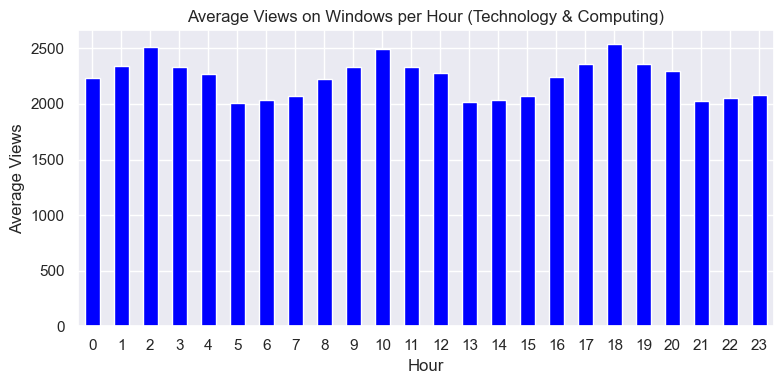

In [1023]:
tech_computing_df = final_data[final_data['segment_name'] == 'Technology & Computing']

# Step 2: Group by hour and calculate sum of Windows views
hourly_windows_sum = tech_computing_df.groupby(tech_computing_df['time_index'].dt.hour)['windows'].sum()

# Step 3: Group by hour and calculate count of data points
hourly_count = tech_computing_df.groupby(tech_computing_df['time_index'].dt.hour)['windows'].count()

# Step 4: Calculate average views on Windows per hour
average_views_per_hour = hourly_windows_sum / hourly_count

# Create a bar plot using matplotlib
plt.figure(figsize=(8, 4))
average_views_per_hour.plot(kind='bar', color='blue')
plt.title('Average Views on Windows per Hour (Technology & Computing)')
plt.xlabel('Hour')
plt.ylabel('Average Views')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [1024]:
data.isnull().sum() # checking for null values

id            0
segment_id    0
time_index    0
view_count    0
devices       0
dtype: int64

In [1025]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95526 entries, 0 to 95525
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95526 non-null  int64 
 1   segment_id  95526 non-null  int64 
 2   time_index  95526 non-null  object
 3   view_count  95526 non-null  int64 
 4   devices     95526 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.6+ MB


In [1026]:
data.view_count.describe()

count    95526.000000
mean      1257.967527
std       1504.672021
min          0.000000
25%        227.000000
50%        615.000000
75%       1955.000000
max      15963.000000
Name: view_count, dtype: float64

1. Mean views for every segment - 1257. 
2. Most of the views are from windows devices. 

In [1027]:
final_data.describe()

,segment_id,view_count,windows,android,mac os x,iphone,other
count,95526.000000,95526.000000,95526.000000,95526.000000,95526.000000,95526.000000,95526.000000
mean,202.907920,1257.967527,865.168980,47.649195,261.582690,60.476582,13.617277
std,163.061023,1504.672021,1036.010017,59.390485,309.851444,74.242968,15.030967
min,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,227.000000,141.000000,8.000000,58.000000,12.000000,3.000000
50%,150.000000,615.000000,445.000000,20.000000,120.000000,25.000000,8.000000
75%,379.000000,1955.000000,1351.000000,72.000000,397.000000,92.000000,21.000000
max,492.000000,15963.000000,10855.000000,639.000000,3352.000000,798.000000,160.000000


In [1028]:
final_data

,segment_id,time_index,view_count,segment_name,windows,android,mac os x,iphone,other
id,,,,,,,,,
1,379,2022-01-01 00:00:00,177,Technology & Computing,120,7,37,9,2
2,379,2022-01-01 01:00:00,135,Technology & Computing,92,5,28,7,1
3,379,2022-01-01 02:00:00,26,Technology & Computing,18,1,5,1,0
4,379,2022-01-01 03:00:00,159,Technology & Computing,108,6,33,8,2
5,379,2022-01-01 04:00:00,50,Technology & Computing,34,2,10,2,0
...,...,...,...,...,...,...,...,...,...
95522,77,2022-11-27 01:00:00,240,Pets,110,12,94,19,5
95523,77,2022-11-27 02:00:00,242,Pets,111,12,94,19,5
95524,77,2022-11-27 03:00:00,207,Pets,95,10,81,17,4


In [1029]:
final_data[final_data['segment_name'] == 'Technology & Computing']['view_count'].mean()

3281.30296803653

In [1030]:
final_data.groupby('segment_name')['view_count'].sum()

segment_name
Books and Literature        6079332
Pets                        1176496
Real Estate                 2672780
Religion & Spirituality     3902934
Science                     3910647
Sensitive Topics            1783994
Shopping                   15504879
Sports                     17948917
Style & Fashion            19358950
Technology & Computing     28744214
Travel                     19085463
Name: view_count, dtype: int64

1. Number of people which interesed in Technology & Computing.
- 24% of overall views 
- most of them are using windows technology which is 64% of views




1. Most of the views are connected to the Technology & Computing segment, which are 24% of overall.

In [1031]:
segment_views_sum = final_data.groupby('segment_name')['view_count'].sum()
segment_views_percentage = (segment_views_sum / (final_data['view_count'].sum())) * 100

segment_views_percentage

segment_name
Books and Literature        5.059002
Pets                        0.979038
Real Estate                 2.224192
Religion & Spirituality     3.247882
Science                     3.254300
Sensitive Topics            1.484576
Shopping                   12.902604
Sports                     14.936444
Style & Fashion            16.109823
Technology & Computing     23.919903
Travel                     15.882237
Name: view_count, dtype: float64

In [1032]:
tech_computing_df = final_data[final_data['segment_name'] == 'Technology & Computing']
tech_computing_df = tech_computing_df.set_index('segment_name')
tech_computing_df.loc[:, 'windows':].sum()

windows     19546104
android      1149788
mac os x     6036267
iphone       1437186
other         287448
dtype: int64

In [1033]:
tech_computing_views = tech_computing_df['view_count'].sum()
tech_computing_windows = tech_computing_df['windows'].sum()
percentage = (tech_computing_windows / tech_computing_views) * 100
percentage 

68.00013387041997

In [1034]:
tech_computing_df

,segment_id,time_index,view_count,windows,android,mac os x,iphone,other
segment_name,,,,,,,,
Technology & Computing,379,2022-01-01 00:00:00,177,120,7,37,9,2
Technology & Computing,379,2022-01-01 01:00:00,135,92,5,28,7,1
Technology & Computing,379,2022-01-01 02:00:00,26,18,1,5,1,0
Technology & Computing,379,2022-01-01 03:00:00,159,108,6,33,8,2
Technology & Computing,379,2022-01-01 04:00:00,50,34,2,10,2,0
...,...,...,...,...,...,...,...,...
Technology & Computing,379,2022-12-31 19:00:00,5600,3808,224,1176,280,56
Technology & Computing,379,2022-12-31 20:00:00,5020,3414,201,1054,251,50
Technology & Computing,379,2022-12-31 21:00:00,5784,3933,231,1215,289,58


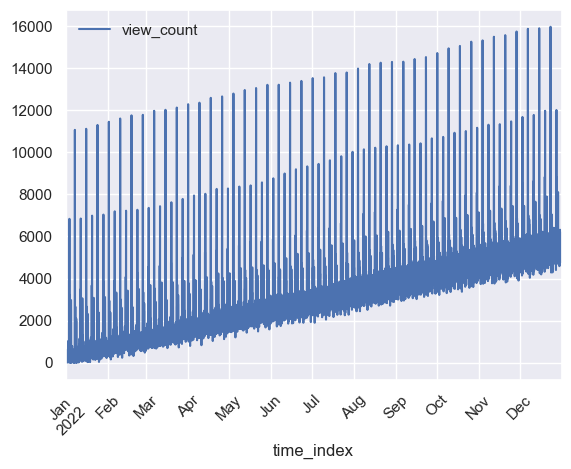

In [1035]:
tech_computing_df.plot(x='time_index',
                       y='view_count',
                       kind='line',
                       rot=45)

plt.show()

In [1036]:

# Convert 'time_index' column to datetime type
tech_computing_df['time_index'] = pd.to_datetime(tech_computing_df['time_index'])

# Extract hour from 'time_index'
tech_computing_df['hour'] = tech_computing_df['time_index'].dt.hour

# Group by hour and calculate the sum of view_count
sum_views_per_hour = tech_computing_df.groupby('hour')['view_count'].sum()

summary_df = pd.DataFrame({'Sum of Views': sum_views_per_hour})
summary_df

,Sum of Views
hour,
0,1200505
1,1257709
2,1347358
3,1251255
4,1220069
5,1078619
6,1093044
7,1110013
8,1195165


In [1037]:
avg_views_per_hour = tech_computing_df.groupby('hour')['view_count'].mean()
average_views_per_hour


time_index
0     2236.558904
1     2343.147945
2     2510.142466
3     2331.115068
4     2273.016438
5     2009.468493
6     2036.356164
7     2067.975342
8     2226.630137
9     2331.487671
10    2493.457534
11    2333.145205
12    2280.616438
13    2018.112329
14    2038.901370
15    2067.043836
16    2245.336986
17    2360.994521
18    2534.676712
19    2360.969863
20    2297.134247
21    2025.164384
22    2051.512329
23    2078.005479
Name: windows, dtype: float64

In [1038]:
hour_highest_views = sum_views_per_hour.idxmax()
hour_highest_views

18

In [1039]:
tech_computing_df['date'] = tech_computing_df['time_index'].dt.date
average_views_per_day = tech_computing_df.groupby('date')['view_count'].mean()
average_views_per_day

date
2022-01-01     188.000000
2022-01-02     253.708333
2022-01-03    1281.458333
2022-01-04     701.208333
2022-01-05     252.708333
                 ...     
2022-12-27    5887.333333
2022-12-28    6521.000000
2022-12-29    5982.125000
2022-12-30    5516.500000
2022-12-31    5554.833333
Name: view_count, Length: 365, dtype: float64

In [1040]:
tech_computing_df

,segment_id,time_index,view_count,windows,android,mac os x,iphone,other,hour,date
segment_name,,,,,,,,,,
Technology & Computing,379,2022-01-01 00:00:00,177,120,7,37,9,2,0,2022-01-01
Technology & Computing,379,2022-01-01 01:00:00,135,92,5,28,7,1,1,2022-01-01
Technology & Computing,379,2022-01-01 02:00:00,26,18,1,5,1,0,2,2022-01-01
Technology & Computing,379,2022-01-01 03:00:00,159,108,6,33,8,2,3,2022-01-01
Technology & Computing,379,2022-01-01 04:00:00,50,34,2,10,2,0,4,2022-01-01
...,...,...,...,...,...,...,...,...,...,...
Technology & Computing,379,2022-12-31 19:00:00,5600,3808,224,1176,280,56,19,2022-12-31
Technology & Computing,379,2022-12-31 20:00:00,5020,3414,201,1054,251,50,20,2022-12-31
Technology & Computing,379,2022-12-31 21:00:00,5784,3933,231,1215,289,58,21,2022-12-31


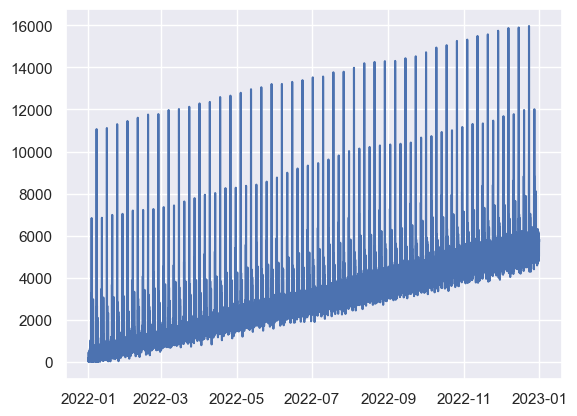

In [1041]:
plt.plot(tech_computing_df.time_index, tech_computing_df.view_count)

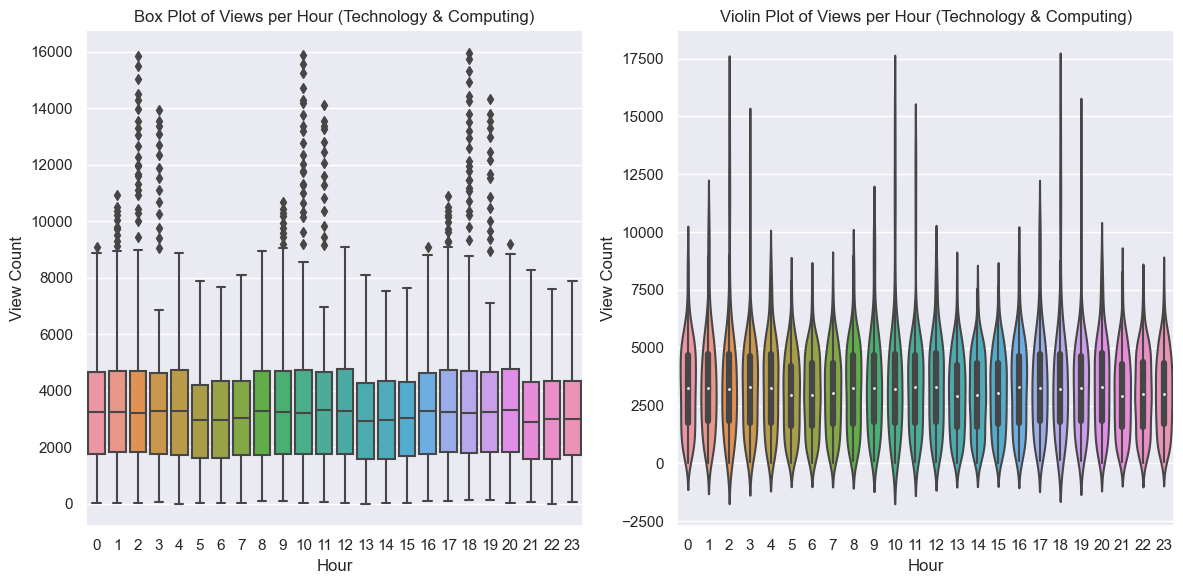

In [1042]:
sns.set(style='darkgrid')

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot
sns.boxplot(data=tech_computing_df, x='hour', y='view_count', ax=ax1)
ax1.set_title('Box Plot of Views per Hour (Technology & Computing)')
ax1.set_xlabel('Hour')
ax1.set_ylabel('View Count')

# Violin Plot
sns.violinplot(data=tech_computing_df, x='hour', y='view_count', ax=ax2)
ax2.set_title('Violin Plot of Views per Hour (Technology & Computing)')
ax2.set_xlabel('Hour')
ax2.set_ylabel('View Count')

plt.tight_layout()

# Display the plots
plt.show()